# AGN Catalog Toolbox (ACT) Encapsulated Testing

This is an example notebook showing the AGN Catalog Toolbox Testing code (written by Chris) in action.

In [1]:
import ACTTestingEncapsulation as actt
import ACTLiterature as actl 

import numpy as np
from matplotlib import pyplot as plt

# Set the redshift of interest here.
redshift = 2

The variables we wish to test are listed in arrays for easy repeated access.

In [2]:
# Variations
variations = [0.2, 0, -0.2]
variable_name = r"$\lambda$"
iterations = len(variations)



Next we create the class, and we call the approprate member functions to read in the data, assign the variables we want and then return the plotting data. Much of the best behaviour is encapsulated by the default arguments, so some parameters do not need to be called. Running this section can take some time.

Note that calling the member function to load in the multidark data expects a file in a subfolder '/BigData/' that is named 'MD_<redshift>.npy, in with the columns x, y, z, scale at accretion, mass at accretion, and mvir.

In [3]:
# Create the master class.
obj = actt.AGNCatalog()
obj.set_z(redshift)

# Load in the MultiDark Haloes.
obj.load_dm_catalog(path_big_data="./BigData/")
obj.assign_stellar_mass()
obj.assign_black_hole_mass()

Loading Dark Matter Catalog
Loading Halo Catalogue
Found file: MD_2.028.npy
dtypes found:  [('x', '<f4'), ('y', '<f4'), ('z', '<f4'), ('id', '<i8'), ('upid', '<i8'), ('mvir', '<f4'), ('Acc_Scale', '<f4'), ('Macc', '<f4')]
    Sorting list w.r.t. upId
    copying all 121706724 elements with up_id = -1
    sorting remaining list list w.r.t. main id
    copying remaining 12228926 elements
Assigning Stellar Mass
Scatter is a thing, valued at 0.001
Assigning Black Hole Mass


### Example of catalog cut - reduce volume

In [4]:

limit = 750 # Mpc/h
flag = (obj.main_catalog['x'] < limit) * (obj.main_catalog['y'] < limit) * (obj.main_catalog['z'] < limit)

obj.main_catalog = obj.main_catalog[flag]
obj.volume = (limit/obj.h)**3


In [5]:
# Loop to support variations in parameters
for i in range(iterations):
    obj.assign_duty_cycle("Schulze")
    
    obj.assign_luminosity(parameter1 = variations[i], parameter2 = -0.25)
    obj.assign_obscuration()
    
    obj.get_wp()
    # We then compute the bias
    obj.get_bias()
    obj.get_hod()

Assigning Duty Cycle, using Schulze's method
GetCorrectFile: Schulze_2.0.csv
Found Schulze file: ./Data/Schulze_2.0.csv
[0.09354141 0.07835531 0.07835531 ... 0.07835531 0.07835531 0.07835531]
Assigning Luminosity
Assigning Nh
Assigning AGN type


/media/chris/Files/EuclidAGN/AGNCatalogToolbox.py:690: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  type[(nh >= 22) * (nh < 24)] = type2[[(nh >= 22) * (nh < 24)]]


Computing wp
Weights, max = 0.327141135931015. , min = 0.07835530489683151
Calculating Bias


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 23,23,15.  Time taken =   0.014 sec
Using AVX2 kernel
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.108 secs


Calculating HOD


/media/chris/Files/EuclidAGN/AGNCatalogToolbox.py:913: RuntimeWarning: invalid value encountered in true_divide
  hod[h] = hist_subject[h] / hist_centrals_unweighted[h]


Assigning Duty Cycle, using Schulze's method
GetCorrectFile: Schulze_2.0.csv
Found Schulze file: ./Data/Schulze_2.0.csv
[0.09354141 0.07835531 0.07835531 ... 0.07835531 0.07835531 0.07835531]
Assigning Luminosity
Assigning Nh
Assigning AGN type
Computing wp
Weights, max = 0.327141135931015. , min = 0.07835530489683151
Calculating Bias


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 23,23,15.  Time taken =   0.011 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.096 secs


Calculating HOD
Assigning Duty Cycle, using Schulze's method
GetCorrectFile: Schulze_2.0.csv
Found Schulze file: ./Data/Schulze_2.0.csv
[0.09354141 0.07835531 0.07835531 ... 0.07835531 0.07835531 0.07835531]
Assigning Luminosity
Assigning Nh
Assigning AGN type
Computing wp
Weights, max = 0.327141135931015. , min = 0.07835530489683151
Calculating Bias


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 23,23,15.  Time taken =   0.011 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.085 secs


Calculating HOD


### XLF

Warning - we have requested redshift 2 - Selecting file Miyaji2015_z1.txt as it is closest
        0             1         2
0   42.11  1.140000e-04   0.42e-4
1   42.60  2.150000e-04   0.37e-4
2   42.92  1.760000e-04   0.35e-4
3   43.04  1.800000e-04   0.29e-4
4   43.17  1.370000e-04   0.18e-4
5   43.29  1.120000e-04   0.15e-4
6   43.42  1.040000e-04   0.11e-4
7   43.54  1.020000e-04   0.09e-4
8   43.67  7.510000e-05   0.68e-5
9   43.79  6.650000e-05   0.63e-5
10  43.92  4.530000e-05   0.45e-5
11  44.17  1.770000e-05   0.23e-5
12  44.46  4.370000e-06   0.74e-6
13  45.16  1.530000e-07   0.58e—7


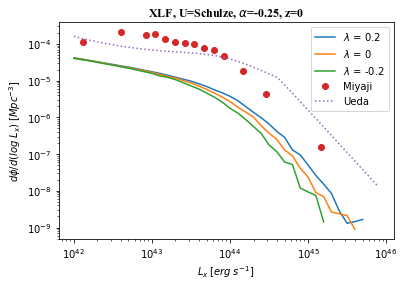

In [6]:
# Plot of the XLF 

plt.figure()

for i in range(iterations):
    try:
        plt.plot(10**obj.XLF_plottingData[i].x, 10**obj.XLF_plottingData[i].y, label = r"{} = {}".format(variable_name, variations[i]))
    except:
        pass
    
    
# XLF Data

XLF = actl.XLFData(redshift)

mXLF_data = XLF.get_miyaji2015()
plt.plot(mXLF_data.x, mXLF_data.y, 'o', label = "Miyaji")

uXLF_data = XLF.get_ueda14(np.arange(42, 46, 0.1))
plt.plot(uXLF_data.x, uXLF_data.y, ':', label = "Ueda")



# Plotting
plt.xlabel(r'$L_x\;[erg\;s^{-1}]$')
plt.ylabel(r'$d\phi /d(log\;L_x)\;[Mpc^{-3}]$')
plt.title(r'XLF, U=Schulze, $\alpha$=-0.25, z=0', fontname = 'Times New Roman')
plt.loglog()
plt.legend()
plt.savefig("./Plots/XLF_Ucomparison_z0.png", dpi=400)
plt.show()

### Eddington Ratio Distribution

Warning - we have requested redshift 2 - Selecting file Geo17z1.75.csv as it is closest
           0         1         2
0  -4.500000  0.049383 -6.024691
1  -4.444444  0.049383 -6.024691
2  -4.388889  0.049383 -6.024691
3  -4.333333  0.049383 -6.024691
4  -4.277778  0.049383 -6.024691
5  -4.222222  0.049383 -6.024691
6  -4.166667  0.062757 -6.024691
7  -4.111111  0.080247 -6.024691
8  -4.055556  0.097737 -6.024691
9  -4.000000  0.115226 -6.024691
10 -3.944444  0.132716 -6.024691
11 -3.888889  0.150206 -6.024691
12 -3.833333  0.167695 -6.024691
13 -3.777778  0.185185 -6.024691
14 -3.722222  0.187784 -6.024691
15 -3.666667  0.154646 -6.024691
16 -3.611111  0.121507 -6.024691
17 -3.555556  0.088369 -6.024691
18 -3.500000  0.055231 -6.024691
19 -3.444444  0.022092 -6.024691
20 -3.388889 -0.011046 -6.024691
21 -3.333333 -0.044185 -6.024691
22 -3.277778 -0.077323 -6.024691
23 -3.222222 -0.110461 -6.024691
24 -3.166667 -0.143600 -6.024691
25 -3.111111 -0.176738 -6.024691
26 -3.055556 -0.20987

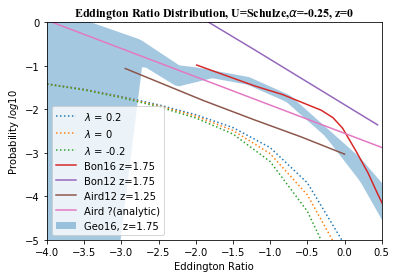

In [7]:
# Plot the Eddington ratio distribution

plt.figure()

for i in range(iterations):
    try:
        plt.plot(obj.Edd_plottingData[i].x, obj.Edd_plottingData[i].y, ':', label = r"{} = {}".format(variable_name, variations[i]))
    except:
        pass

EddData = actl.EddingtonDistributionData(redshift)
#plt.plot(EddData.Geo.x, EddData.Geo.y, label = "Geo")

plt.fill_between(EddData.Geo.x, EddData.Geo.yu, EddData.Geo.yd, alpha=0.4, label = "Geo16, z={}".format(EddData.Geo.z) )

print('x', EddData.Geo.x)
print('yu', EddData.Geo.yu)
print('yd', EddData.Geo.yd)


plt.plot(EddData.Bon16.x, EddData.Bon16.y, label = "Bon16 z={}".format(EddData.Bon16.z)) 
plt.plot(EddData.Bon12.x, EddData.Bon12.y, label = "Bon12 z={}".format(EddData.Bon12.z))
plt.plot(EddData.Aird12.x, EddData.Aird12.y, label = "Aird12 z={}".format(EddData.Aird12.z) )

eddbin = np.arange(-4, 1., 0.5)
probSche = EddData.AirdDist(eddbin)
plt.plot(eddbin, probSche, label = "Aird ?(analytic)")
plt.title(r'Eddington Ratio Distribution, U=Schulze,$\alpha$=-0.25, z=0', fontname = 'Times New Roman')
plt.xlabel("Eddington Ratio")
plt.ylabel("Probability $log10$")
plt.xlim((-4, 0.5))
plt.ylim((-5, 0))

plt.legend()

plt.savefig("./Plots/ERD_Ucomparison_z0.png", dpi=400)

plt.show()


### WP

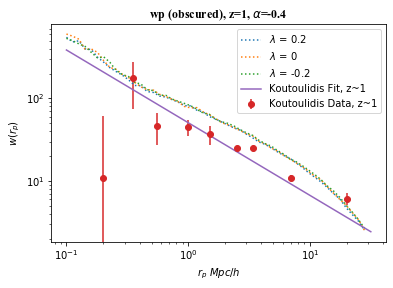

In [8]:
plt.figure()

wp_data = actl.WPData(redshift)

for i in range(iterations):
    try:
        plt.plot(obj.WP_plottingData[i].x, obj.WP_plottingData[i].y, ':', label = r"{} = {}".format(variable_name, variations[i]))
        if i == 4:
            break
    except:
        pass
    
plt.errorbar(wp_data.r_Koutoulidis, wp_data.wp_Koutoulidis,\
                yerr = wp_data.wp_Koutoulidis_e, fmt='o', label = "Koutoulidis Data, z~1")

plt.plot(obj.wpbins, wp_data.k_power_law(obj.wpbins), label = "Koutoulidis Fit, z~1")
plt.title(r'wp (obscured), z=1, $\alpha$=-0.4', fontname = 'Times New Roman')    
plt.xlabel(r'$r_p$ $Mpc/h$')
plt.ylabel(r'$w(r_p)$')    

plt.legend()
plt.loglog()
plt.savefig("./Plots/clustering_varyingk_z1.png", dpi=400)

plt.show()



### Bias

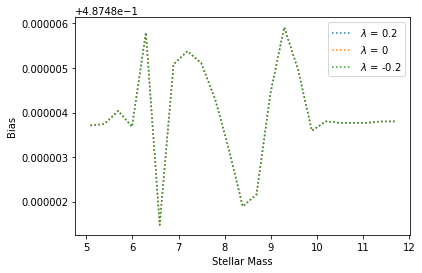

In [9]:
plt.figure()

for i in range(iterations):
    plt.plot(obj.bias_plottingData[i].x, obj.bias_plottingData[i].y, ':', label = r"{} = {}".format(variable_name, variations[i]))
    
plt.xlabel("Stellar Mass")
plt.ylabel("Bias")
plt.legend()
plt.show()

### HOD

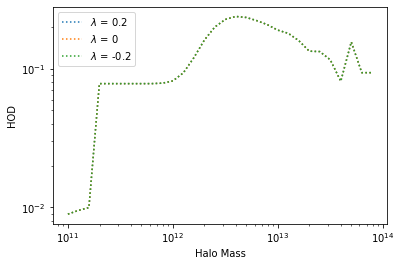

In [10]:




plt.figure()

for i in range(iterations):
    plt.plot(10**obj.HOD_plottingData[i].x, obj.HOD_plottingData[i].y, ':', label = r"{} = {}".format(variable_name, variations[i]))
    
plt.xlabel("Halo Mass")
plt.ylabel("HOD")
plt.loglog()
plt.legend()
plt.show()